In [1]:
import pandas as pd
import numpy as np
import time, os

In [2]:
defaults = pd.read_csv('../../rawdata/weather/weather.defaults')
defaults = defaults.columns.values

def removeErrorValues(row):
    
    if( (row > 30 and str(row) in defaults) or (row == 999.0) ):
        return np.nan
    else:
        return row

In [ ]:
for i in defaults:
    print(i)

In [3]:
cols=[0,11, 21, 28, 135, 136, 137, 138,  139, 140, 143, 144, 147, 148] 
p='%Y-%m-%d %H:%M:%S'

# weatherDFrame_header = pd.read_csv('../../rawdata/weather/weather.header')
weatherDFrame_header = pd.read_csv('../../rawdata/weather/weather.header', usecols = cols)
weatherDFrame = pd.read_csv('../../rawdata/weather/weather', usecols = cols, names=weatherDFrame_header.columns.values)

weatherDFrame['datetime'] = pd.to_datetime(weatherDFrame['time'],unit='s')
weatherDFrame['datetime'].dt.tz_localize('utc').dt.tz_convert('US/Eastern')

weatherDFrame.sort_values(by=['datetime'], inplace=True)
weatherDFrame.set_index(['datetime'], inplace = True)
weatherDFrame.drop(['time'], axis=1, inplace=True)

In [4]:
### cleaning default values
weatherDFrame['Spd[Wind]'] = weatherDFrame.apply(lambda row: removeErrorValues(row['Spd[Wind]']), axis=1)
weatherDFrame['Amt[PrecipHourly1]'] = weatherDFrame.apply(lambda row: removeErrorValues(row['Amt[PrecipHourly1]']), axis=1)
weatherDFrame['Temp[Temp]'] = weatherDFrame.apply(lambda row: removeErrorValues(row['Temp[Temp]']), axis=1)
# weatherDFrame['Amt[Snowfall]'] = weatherDFrame.apply(lambda row: removeErrorValues(row['Amt[Snowfall]']), axis=1)

In [5]:
weatherDFrame['Spd[Wind]'] = weatherDFrame['Spd[Wind]'].fillna(weatherDFrame['Spd[Wind]'].shift())
weatherDFrame['Amt[PrecipHourly1]'] = weatherDFrame['Amt[PrecipHourly1]'].fillna(0)
weatherDFrame['Temp[Temp]'] = weatherDFrame['Temp[Temp]'].fillna((weatherDFrame['Temp[Temp]'].shift() + weatherDFrame['Temp[Temp]'].shift(-1))/2)

In [7]:
precipitation = weatherDFrame[['Amt[PrecipHourly1]']]
precipitation = precipitation.resample('H').agg({'Amt[PrecipHourly1]': 'mean'})
precipitation = precipitation.reset_index()
precipitation['datetime'] = (precipitation['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
precipitation.set_index('datetime', inplace=True)
precipitation = precipitation.loc[1388552400:1451624399]

wind = weatherDFrame[['Spd[Wind]']]
wind = wind.resample('H').agg({'Spd[Wind]': 'mean'})
wind = wind.reset_index()
wind['datetime'] = (wind['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
wind.set_index('datetime', inplace=True)
wind = wind.loc[1388552400:1451624399]


# snowfall = weatherDFrame[['Amt[Snowfall]']]
# snowfall = snowfall.resample('H').agg({'Amt[Snowfall]': 'sum'})
# snowfall = snowfall.reset_index()
# snowfall['datetime'] = (snowfall['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
# snowfall.set_index('datetime', inplace=True)
# snowfall = snowfall.loc[1388552400:1451624399]
# snowfall = snowfall['2014-01-01':'2016-01-01']


temp = weatherDFrame[['Temp[Temp]']]
temp = temp.resample('H').agg({'Temp[Temp]': 'mean'})
temp = temp.reset_index()
temp['datetime'] = (temp['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
temp.set_index('datetime', inplace=True)
temp = temp.loc[1388552400:1451624399]
# temp = temp['2014-01-01':'2016-01-01']

# snowfall.to_csv('../../data/weather/snowfall.csv')
precipitation.to_csv('../../data/weather/precipitation.csv', index=False)
wind.to_csv('../../data/weather/wind.csv', index=False)
temp.to_csv('../../data/weather/temperature.csv', index=False)

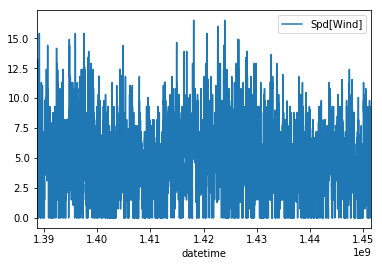

In [370]:
# snowfall = weatherDFrame[['Q[Snowfall]']]
# snowfall[snowfall['Q[Snowfall]'] < 90]['2014-01-01':'2016-01-01']

# snowfall[ (snowfall['Amt[Snowfall]'] > 0) & (snowfall['Amt[Snowfall]'] < 99)]
wind.plot()